# NLP

## Table of Contents
1. [Class Distribution](#class)
2. [Cleaning and Preprocessing Data](#clean)

In [2]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize,RegexpTokenizer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.dummy import DummyClassifier
from nltk.corpus import stopwords
import string
from nltk import FreqDist
import sklearn
from sklearn.feature_extraction.text import CountVectorizer #,TfidfVectorizer
from custom import * #personal functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_pickle('reviews.pkl')

In [4]:
df.head()

,Review,Score
0,\n Keough's...,fresh
1,\n While Th...,fresh
2,"\n If ""The ...",fresh
3,"\n ""The Lod...",fresh
4,\n There's ...,rotten


In [5]:
df.shape

(9244, 2)

## Class Distribution

How many reviews do we have in each category?

In [6]:
df['Score'].value_counts()

fresh     5048
rotten    4196
Name: Score, dtype: int64

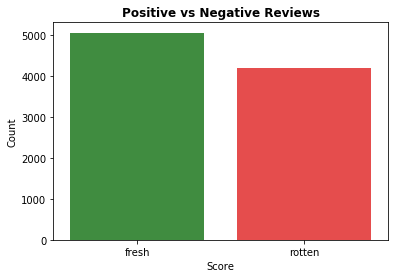

In [7]:
sns.countplot(df['Score'], alpha =.80, palette= ['green','red'])
plt.title('Positive vs Negative Reviews', fontweight='bold')
plt.ylabel('Count')
plt.show()

## Cleaning and Preprocessing Data <a id='clean'></a>

Let's see what our text looks like so we can clean and tokenize it properly.

In [8]:
df['Review'][0]

"\n                                    Keough's work is so strong, so effective, that by the time we learn the ultimate fate of Grace, we would have bought into any of the possible options.\n                                "

For our stopwords, we use NLTK's english stopwords and add punctuation to these.

In [9]:
stopwords_list = stopwords.words('english')+list(string.punctuation)
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Next, we write a function to clean our reviews, and then use it to clean every review in the dataset. For our tokenizer, we want to add some regex to make sure we are catching words with apostrophes as a single token.

In [11]:
def process_review(review):
    """Returns tokenized movie review with previously defined stopwords removed."""
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    tokens = nltk.regexp_tokenize(review, pattern)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stopwords_list]
    return stopwords_removed    

In [12]:
processed_df = df.copy()

In [14]:
processed_df['Review'] = processed_df['Review'].apply(process_review)

In [17]:
processed_df['Review'][0]

["keough's",
 'work',
 'strong',
 'effective',
 'time',
 'learn',
 'ultimate',
 'fate',
 'grace',
 'would',
 'bought',
 'possible',
 'options']

In [10]:
token = RegexpTokenizer(r"([a-zA-Z]+(?:'[a-z]+)?)")

In [11]:
cv = CountVectorizer(lowercase=True,stop_words=stopwords_list,ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df['Review'])

In [20]:
# print(text_counts)

To clean the strings, we'll remove punctuation and capitalization, so that all words will be counted correctly.

In [15]:
# def remove_stopwords(list_of_strings):
#     list_of_strings = [word.lower() for word in list_of_strings]
#     return [word for word in list_of_strings if word not in stopwords_list]

# df['Review'] = df['Review'].apply(remove_stopwords)

In [19]:
# print(df['Review'][0])

In [17]:
#grab 50 most common words
freqdist = FreqDist(sum(df['Review'], [])) #sum combines all of our reviews into one list
freqdist.most_common(50)

[('movie', 1366),
 ('horror', 1132),
 ('film', 1125),
 ('one', 743),
 ('like', 654),
 ('even', 419),
 ('much', 389),
 ('director', 353),
 ('story', 344),
 ('good', 344),
 ('genre', 316),
 ('time', 307),
 ('little', 296),
 ('first', 294),
 ('way', 293),
 ('make', 285),
 ('scary', 284),
 ('enough', 281),
 ('movies', 273),
 ("there's", 269),
 ('never', 268),
 ('well', 268),
 ('fun', 247),
 ('thriller', 246),
 ("that's", 242),
 ('makes', 231),
 ('us', 231),
 ('made', 230),
 ('best', 217),
 ('new', 215),
 ('get', 213),
 ('may', 213),
 ('original', 208),
 ('characters', 203),
 ('something', 200),
 ('films', 196),
 ('still', 195),
 ('two', 186),
 ('better', 184),
 ('might', 183),
 ('sense', 182),
 ('bad', 182),
 ('kind', 181),
 ('many', 180),
 ('real', 177),
 ('also', 173),
 ('could', 173),
 ('really', 172),
 ('go', 172),
 ('long', 170)]

In [18]:
# add some unimportant words to stopwords list and remove from our reviews
stopwords_list += ['movie', 'film', "there's", "that's"]
df['Review'] = df['Review'].apply(remove_stopwords)

In [19]:
freqdist = FreqDist(sum(df['Review'], []))
freqdist.most_common(50)

[('horror', 1132),
 ('one', 743),
 ('like', 654),
 ('even', 419),
 ('much', 389),
 ('director', 353),
 ('story', 344),
 ('good', 344),
 ('genre', 316),
 ('time', 307),
 ('little', 296),
 ('first', 294),
 ('way', 293),
 ('make', 285),
 ('scary', 284),
 ('enough', 281),
 ('movies', 273),
 ('never', 268),
 ('well', 268),
 ('fun', 247),
 ('thriller', 246),
 ('makes', 231),
 ('us', 231),
 ('made', 230),
 ('best', 217),
 ('new', 215),
 ('get', 213),
 ('may', 213),
 ('original', 208),
 ('characters', 203),
 ('something', 200),
 ('films', 196),
 ('still', 195),
 ('two', 186),
 ('better', 184),
 ('might', 183),
 ('sense', 182),
 ('bad', 182),
 ('kind', 181),
 ('many', 180),
 ('real', 177),
 ('also', 173),
 ('could', 173),
 ('really', 172),
 ('go', 172),
 ('long', 170),
 ('funny', 170),
 ('work', 167),
 ('would', 166),
 ('old', 160)]

In [18]:
#vocab size w all stop words removed
len(freqdist)

In [21]:
df['Score'] = df['Score'].apply(lambda x: 0 if x == "rotten" else 1)
df.head()

,Review,Score
0,"[keough's, work, strong, effective, time, lear...",1
1,"[lodge, hearty, horror, films, desperately, wa...",1
2,"[lodge, answer, questions, poses, okay, streng...",1
3,"[lodge, perfect, treat, like, movies, dark, di...",1
4,"[atmosphere, genuine, dread, screenplay, makes...",0


In [23]:
models = ['logistic','knn','tree','rf','AdaBoost','xgb','GrdBoost','svc']
classification_models(text_counts,df['Score'],models)

Using logistic
Using knn
Using tree
Using rf
Using AdaBoost
Using xgb
Using GrdBoost
Using svc


,Model,Accuracy,Recall,Precision,F1
0,logistic,0.764738,0.799807,0.783886,0.791766
1,knn,0.510546,0.321083,0.620561,0.423199
2,tree,0.670633,0.691489,0.711443,0.701324
3,rf,0.741482,0.755319,0.776342,0.765686
4,AdaBoost,0.612764,0.939072,0.597906,0.730625
5,xgb,0.630611,0.927466,0.611997,0.737409
6,GrdBoost,0.634397,0.922631,0.615484,0.738390
7,svc,0.748513,0.822050,0.751547,0.785219


In [8]:
# tfidf_vectorizer=TfidfVectorizer(use_idf=True)

# tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(df['Review'])
# # get the first vector out (for the first document)
# first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0]
# # place tf-idf values in a pandas data frame
# df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
# df.sort_values(by=["tfidf"],ascending=False)